# Random Stock Generator

This function creates a random stock chart without using any models.
Generally, some methods such as Brownian Motion are used to create and replicate the stock charts.
Our goal here is to create something totally random to check if the decision mechanism work on any situation.
In this project, the decision mechanism is taken very simple however, when this project gets more complicated using more complex methodologies for the decision mechanism, the code will understand the method that is used to create the stock chart.
However, since the real world stocks are changing with lots of variants, it is best to use something so random that the decision mechanism cannot understand and fit a model. Thus, we create this function with some assumptions to get the best possible random scenarios.

Let's define the libraries that we are going to use:

In [77]:
import math
import numpy
import random
import decimal
import scipy.linalg
import matplotlib
import numpy.random as nrand
import matplotlib.pyplot as plt

Now let's define our variables:

Since we don't care about the real prices let's start with the initial price of 1000.

In [78]:
InitialPrice = 1000

We'll create two arrays, RandomInc which will contain the percentage of increase or decrease from the previous price. 
We'll think that our chart is for 15000 "1 minute movements" on a stock. And we'll set the first element of Random Price as the Initial Price.

In [79]:
RandomInc = numpy.empty(15000)
RandomPrice = numpy.empty(15000)
RandomPrice[0] = InitialPrice

Here for the random chart, we make some assumptions. Since this is totally random, we'll assume that the below code will contain all of the possible scenarios that can happen in any time. This will be our first and most important assumption.

Other assumptions will be:
1) The price can move maximum of %1 in a minute in normal time.
2) We set a variable suddenjump which will be decided every minute. If this number, fits the condition we'll assume that the price can move maximum of %5 in a minute. 
3) We can change the values of %1 and %5, however the chart seems to converge to 0 when we take bigger values. (This may be a point to look deeper in the further phases of the project)
4) Since we don't want the stock to liquidate itself (go bankrupt), we'll assume that the price cannot go below 50 (considering the initial price is 1000).

In [80]:
for i in range(15000):
    suddenjump = random.uniform(0,1)
    if suddenjump < 0.1:
        RandomInc[i] = random.uniform(-0.05,0.05)
    else:
        RandomInc[i] = random.uniform(-0.01,0.01)
            
    if i!=14999:
        if RandomPrice[i]+RandomPrice[i]*RandomInc[i] > 50:
            RandomPrice[i+1] = RandomPrice[i]+RandomPrice[i]*RandomInc[i]
        else:   
            RandomPrice[i+1] = RandomPrice[i]-RandomPrice[i]*RandomInc[i]

Just some more arrays to analyze further.

In [81]:
RandomPrice5 = numpy.empty(3000)
    
for i in range(3000):
    sum = 0
    for j in range(i*5,(i+1)*5):
        sum = sum + RandomPrice[j]  
    RandomPrice5[i]=sum/5
            
RandomPrice15 = numpy.empty(1000)
    
for i in range(1000):
    sum = 0
    for j in range(i*15,(i+1)*15):
        sum = sum + RandomPrice[j]  
    RandomPrice15[i]=sum/15
print(RandomPrice[14999])

162.3983716092819


Now we'll plot our graph:

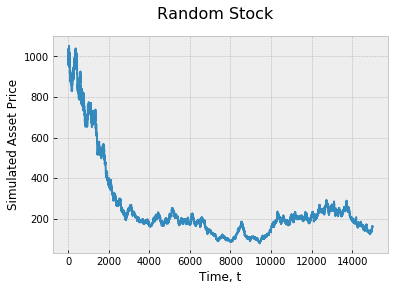

In [82]:
plt.style.use(['bmh'])
fig, ax = plt.subplots(1)
fig.suptitle('Random Stock', fontsize=16)
ax.set_xlabel('Time, t')
ax.set_ylabel('Simulated Asset Price')
x_axis = numpy.arange(0, 15000)

plt.plot(x_axis, RandomPrice)
plt.show()